In [79]:
import pandas as pd
import re

df = pd.read_excel("data/appliedAI_Use Case Library - Risk Class_TUM.ai.xlsx", index_col=None, header=2)
df_gen = pd.read_csv("data/generated_ideas (2).csv")

with open("data/AI_Act_Annex_III_+_Amendments_of_April_2022_for_Use_Case_Library.txt") as f:
    annex_file = f.read()
    
with open("data/gpt_me.txt") as f:
    moritz_file = f.read()

In [80]:
moritz_file.split("\n\n")

['An AI is used to biometrically identify people in shopping centers. The data is\nused to create customer profiles and rank customers according to their\nspending habits. Shop personnel can then assist high-promising customers to\nmaximize their value. The AI would be used by shop owners as well as mall\nowners.',
 'The AI is used to navigate airplanes when approaching airports. This shall\nprevent aircrafts from crashing without human supervision. The AI takes into\naccount the characteristics of the airplane, weather data as well as the\nlocation of all planes nearby. This AI can be used by airports who want to\nincrease security in the air.',
 'The AI is used to evaluate the performance of test takers in a language test.\nThis language test is a prerequisite for students who want to study abroad or\npeople who want to prove their language knowledge to possible foreign\nemployers. The AI is able to score the spoken word more effectively than\nhumans because of the ability to evaluat

In [97]:
def parse_numbered(text):
    mapp = dict()
    activate= False
    num = None
    for txt in re.split("\\n([0-9])\.", text):
        if txt.isdigit():
            activate = True
            num = int(txt)
        elif activate:
            mapp[num] = txt
            activate= False
    end = text.split("8a")[1]
    mapp[9], mapp[10] = re.split("\([a-b]\)", end)[1:]
    mapp[8] = mapp[8].split("8a")[0]
    mapp[10] = mapp[10].split("Version")[0]
    return pd.DataFrame(pd.Series(mapp.values()))
df_annex = parse_numbered(annex_file)
df_moritz = pd.DataFrame(pd.Series(moritz_file.split("\n\n")))

In [98]:
df_moritz

,0
0,An AI is used to biometrically identify people...
1,The AI is used to navigate airplanes when appr...
2,The AI is used to evaluate the performance of ...
3,Choosing the right employee can be hard for co...
4,The government offers services to people in cr...
5,In most cases the police is not present when a...
6,Many people seek asylum in European states. Be...
7,Many countries are lacking judges currently. T...
8,During holiday times in the summer the amount ...
9,In Germany it can be hard to open a bank accou...


In [99]:
df_annex

,0
0,Biometric identification and categorisation of...
1,Management and operation of critical infrastru...
2,Education and vocational training:\n(a) ...
3,"Employment, workers management and access to s..."
4,Access to and enjoyment of essential private s...
5,Law enforcement:\n(a) AI systems intend...
6,"Migration, asylum and border control managemen..."
7,Administration of justice and democratic proce...
8,AI systems intended to be used to gen...
9,AI systems intended to be used to gen...


In [100]:
!pwd

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/auto/brno2/home/xstary1/brno6/tumai-makeathon22


In [101]:
df["risk"] = df["Is the AI System high-risk or low risk?"]
df["name"]  = df["Use case name EN"]
df["desc"] = df["Description"]
df["bus_ch"] = df["Business Challenge"] 
df["system"] = df["AI System"]

df = df.fillna("")


In [102]:
df_gen["description"] = df_gen["description"].apply(lambda x: x.strip())

In [103]:
df_gen["tags"].unique()

array(['biometric identification', 'categorisation of people',
       'management of critical infrastructure',
       'operation of critical infrastructure',
       'education test evaluation', 'vocational test evaluation',
       'worker evaluation', 'work evaluationworkers management',
       'work management', 'human resources services',
       'access to self-employment', 'manage access to venues',
       'manage access from the government',
       'manage access to public goods', 'credit scoring',
       'police suspects', 'help with migration legal process',
       'help with asylum legal process', 'border control management',
       'legal documents generation', 'counting votes', 'counting ballets',
       'decision process in law facilities', 'democratic processes'],
      dtype=object)

In [104]:
df = df[df["risk"] != "It is unclear"]
len(df)

98

In [105]:
df.head()

,index,Use Case ID,Use Case Name,Use case name EN,Beschreibung,Description,Geschäftsproblem,Business Challenge,KI Lösung,AI System,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,risk,name,desc,bus_ch,system
0,0,1,Optimierte Stellenangebote,Optimised job offers,Ein zentrales Thema im Einstellungsprozess ist...,A central topic in the setting process is to w...,"Viele Unternehmen tun sich schwer, die richtig...",Many companies find it difficult to win the ri...,Zur Analyse und Optimierung seines Recruiting-...,To analyze and optimize its recruiting materia...,...,,,,,,low-risk,Optimised job offers,A central topic in the setting process is to w...,Many companies find it difficult to win the ri...,To analyze and optimize its recruiting materia...
1,1,2,Analyse eines Videointerviews,Analysis of a video interview,Während des Rekrutierungsprozesses werden nich...,"During the recruitment process, not only the h...",Das Kundenbetreuungskonzept ist ein zentrales ...,The customer care concept is a central element...,HAPPYCAR hat die KI-Lösung von Retorio zur Ana...,Happycar has integrated Retorio's AI solution ...,...,,,,,,high-risk,Analysis of a video interview,"During the recruitment process, not only the h...",The customer care concept is a central element...,Happycar has integrated Retorio's AI solution ...
2,2,3,Vorhersage von Personalfluktuation,Predicting staff turnover,Bestehende Maßnahmen zur Steigerung der Mitarb...,Existing measures to increase employee loyalty...,Die Bindung von Top-Talenten ist ein wichtiger...,The binding of top talents is an important asp...,IBM hat eine KI-Lösung zur Vorhersage von Pers...,IBM has developed a AI solution to predict per...,...,,,,,,high-risk,Predicting staff turnover,Existing measures to increase employee loyalty...,The binding of top talents is an important asp...,IBM has developed a AI solution to predict per...
3,3,4,Leistungsüberwachung / Beobachtung des Mitarbe...,Performance monitoring / observation of employ...,"Engagement-Monitoring-Tools, die auf KI basier...",Engagement monitoring tools based on AI can ex...,Die Bewertung des Mitarbeiterengagements ist i...,The assessment of employee engagement is a cha...,Die KI-Lösung von KeenCorp analysiert kontinui...,The Ki solution from Keencorp continuously ana...,...,,,,,,high-risk,Performance monitoring / observation of employ...,Engagement monitoring tools based on AI can ex...,The assessment of employee engagement is a cha...,The Ki solution from Keencorp continuously ana...
4,4,5,Kandidatensuche,Search for candidates,Die am besten geeigneten Kandidat:innen zu fin...,The most suitable candidate: finding inside is...,"Poshmark, ein führendes E-Commerce-Unternehmen...","Poshmark, a leading e-commerce company, wanted...",Poshmark arbeitete mit einem KI-basierten Star...,Poshmark worked with a AI-based startup to str...,...,,,,,,high-risk,Search for candidates,The most suitable candidate: finding inside is...,"Poshmark, a leading e-commerce company, wanted...",Poshmark worked with a AI-based startup to str...


In [106]:
df = df[df["risk"] != ""]


In [107]:
df["risk"].value_counts()


low-risk     84
high-risk    14
Name: risk, dtype: int64

In [108]:
len(df)
df = df.reset_index()

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df['risk'],
                                                    stratify=df['risk'], 
                                                    test_size=0.60,
                                                   random_state=40)

In [110]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#Sentences we want to encode. Example:


train_gen = df_gen["description"].to_list() + X_train[X_train["risk"] == "low-risk"]["desc"].to_list()
sentences_gen = train_gen

sentences_cross = df["desc"].to_list()
sentences_train = X_train["desc"].to_list()
sentences_test = X_test["desc"].to_list() + X_train[X_train["risk"] == "high-risk"]["desc"].to_list()
sentences_annex = df_annex[0].to_list()
sentences_moritz = df_moritz[0].to_list()


#Sentences are encoded by calling model.encode()

embeddings_gen = model.encode(sentences_gen)

embeddings_train = model.encode(sentences_train)
embeddings_test = model.encode(sentences_test)
embeddings_cross = model.encode(sentences_cross)

embeddings_annex = model.encode(sentences_annex)
embeddings_moritz = model.encode(sentences_moritz)

In [111]:
sentences_moritz

['An AI is used to biometrically identify people in shopping centers. The data is\nused to create customer profiles and rank customers according to their\nspending habits. Shop personnel can then assist high-promising customers to\nmaximize their value. The AI would be used by shop owners as well as mall\nowners.',
 'The AI is used to navigate airplanes when approaching airports. This shall\nprevent aircrafts from crashing without human supervision. The AI takes into\naccount the characteristics of the airplane, weather data as well as the\nlocation of all planes nearby. This AI can be used by airports who want to\nincrease security in the air.',
 'The AI is used to evaluate the performance of test takers in a language test.\nThis language test is a prerequisite for students who want to study abroad or\npeople who want to prove their language knowledge to possible foreign\nemployers. The AI is able to score the spoken word more effectively than\nhumans because of the ability to evaluat

In [112]:
embeddings_annex.shape

(10, 384)

In [113]:
len(df),len(embeddings_cross)

(98, 98)

In [114]:
df.index

RangeIndex(start=0, stop=98, step=1)

/storage/brno2/home/xstary1/brno6/.local-adv.SIF/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/storage/brno2/home/xstary1/brno6/.local-adv.SIF/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


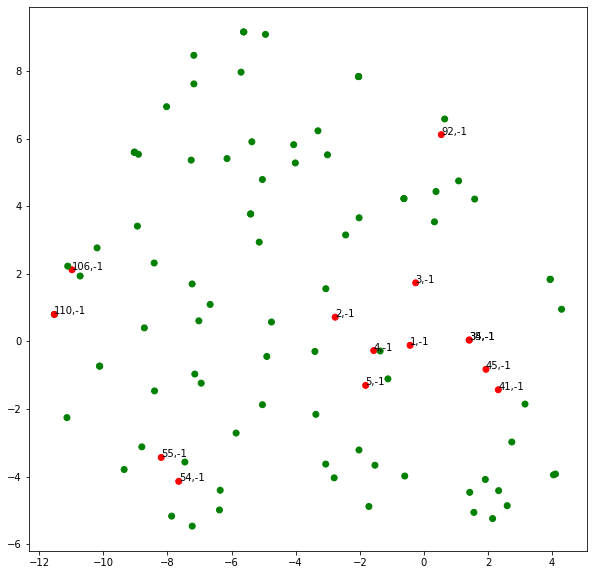

In [115]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

tsne = make_pipeline(StandardScaler(),TSNE(perplexity=30, metric="cosine"))
dbscan = make_pipeline(StandardScaler(), DBSCAN(eps=0.4, min_samples=3, metric="cosine"))


clusters = dbscan.fit_predict(embeddings_cross)
res = tsne.fit_transform(embeddings_cross)

plt.figure(figsize=(10,10))
plt.scatter(x=res[:,0], y=res[:, 1], c=df["risk"].replace({"low-risk": "green", "high-risk": "red"}))
for index, row in df[df["risk"]=="high-risk"].iterrows():
    plt.annotate(str(row[1])+ "," + str(clusters[0]), res[index])
#     print(row[1])
    

In [116]:
res.shape

(98, 2)

In [117]:
pd.Series(clusters).value_counts()

-1    83
 0     6
 1     3
 2     3
 3     3
dtype: int64

In [118]:
embeddings_train.shape

(39, 384)

In [119]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [120]:
hirisk = embeddings_cross[df[df["risk"] == "high-risk"].index]
lowrisk = embeddings_cross[df[df["risk"] == "low-risk"].index]

In [121]:
hirisk

array([[-0.06679387,  0.01739059,  0.00367336, ...,  0.06424613,
        -0.01493834,  0.01466956],
       [-0.04711025, -0.05883188, -0.01235057, ...,  0.01426129,
         0.00721162,  0.02790828],
       [-0.04783431,  0.00723232,  0.0122018 , ..., -0.03953348,
         0.02966502,  0.01120646],
       ...,
       [ 0.03668308,  0.01549987, -0.04731122, ...,  0.05112401,
         0.00508045,  0.00499014],
       [-0.07315786, -0.00843746, -0.09181997, ..., -0.00313208,
         0.05961251, -0.02156214],
       [-0.03777086, -0.00379693, -0.00740161, ...,  0.02492635,
         0.01026284, -0.03205277]], dtype=float32)

In [122]:
df[df["risk"] == "high-risk"]

,level_0,index,Use Case ID,Use Case Name,Use case name EN,Beschreibung,Description,Geschäftsproblem,Business Challenge,KI Lösung,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,risk,name,desc,bus_ch,system
1,1,1,2,Analyse eines Videointerviews,Analysis of a video interview,Während des Rekrutierungsprozesses werden nich...,"During the recruitment process, not only the h...",Das Kundenbetreuungskonzept ist ein zentrales ...,The customer care concept is a central element...,HAPPYCAR hat die KI-Lösung von Retorio zur Ana...,...,,,,,,high-risk,Analysis of a video interview,"During the recruitment process, not only the h...",The customer care concept is a central element...,Happycar has integrated Retorio's AI solution ...
2,2,2,3,Vorhersage von Personalfluktuation,Predicting staff turnover,Bestehende Maßnahmen zur Steigerung der Mitarb...,Existing measures to increase employee loyalty...,Die Bindung von Top-Talenten ist ein wichtiger...,The binding of top talents is an important asp...,IBM hat eine KI-Lösung zur Vorhersage von Pers...,...,,,,,,high-risk,Predicting staff turnover,Existing measures to increase employee loyalty...,The binding of top talents is an important asp...,IBM has developed a AI solution to predict per...
3,3,3,4,Leistungsüberwachung / Beobachtung des Mitarbe...,Performance monitoring / observation of employ...,"Engagement-Monitoring-Tools, die auf KI basier...",Engagement monitoring tools based on AI can ex...,Die Bewertung des Mitarbeiterengagements ist i...,The assessment of employee engagement is a cha...,Die KI-Lösung von KeenCorp analysiert kontinui...,...,,,,,,high-risk,Performance monitoring / observation of employ...,Engagement monitoring tools based on AI can ex...,The assessment of employee engagement is a cha...,The Ki solution from Keencorp continuously ana...
4,4,4,5,Kandidatensuche,Search for candidates,Die am besten geeigneten Kandidat:innen zu fin...,The most suitable candidate: finding inside is...,"Poshmark, ein führendes E-Commerce-Unternehmen...","Poshmark, a leading e-commerce company, wanted...",Poshmark arbeitete mit einem KI-basierten Star...,...,,,,,,high-risk,Search for candidates,The most suitable candidate: finding inside is...,"Poshmark, a leading e-commerce company, wanted...",Poshmark worked with a AI-based startup to str...
5,5,5,6,Stellenausschreibungen,Job advertisements,Ein wichtiger Aspekt des Personalmarketings is...,An important aspect of personnel marketing is ...,Domino’s Pizza ist ein weltweit führender Pizz...,Domino’s pizza is a worldwide leading pizza su...,NRV arbeitete mit einer KI-basierten Plattform...,...,,,,,,high-risk,Job advertisements,An important aspect of personnel marketing is ...,Domino’s pizza is a worldwide leading pizza su...,NRV worked with a AI-based platform for job ad...
29,29,34,35,Biometrik / Authentifizierung Beispiel 1,,"Unternehmen können KI so nutzen, dass sie ihre...","Companies can use AI so that they prioritize, ...",Unternehmen sind sich zunehmend des möglichen ...,Companies are increasingly aware of the possib...,Die Sprachüberprüfung erfolgt während des gesa...,...,,,,,,high-risk,,"Companies can use AI so that they prioritize, ...",Companies are increasingly aware of the possib...,The language check takes place throughout the ...
30,30,35,36,Biometrik / Authentifizierung Beispiel 2,,"Unternehmen können KI so nutzen, dass sie ihre...","Companies can use AI so that they prioritize, ...",Während des schnellen Wachstums der Online-Ban...,During the rapid growth of the online bank and...,Revolut hat mit einem KI-Lösungsanbieter zusam...,...,,,,,,high-risk,,"Companies can use AI so that they prioritize, ...",During the rapid growth of the online bank and...,Revolut has worked with a AI solution provider...
33,33,41,42,Intelligente Suche Beispiel 2,,Das Finanzinstitut hat sich 2017 mit einem ext...,The financial institution teamed up with an ex...,Magento ist eine Open-Source-E-Commerce-Plattf...,Magento is an open source e-co

In [160]:
lowrisk

array([[-0.03139497,  0.00795051,  0.01129102, ...,  0.05814595,
         0.02363143,  0.03774891],
       [-0.01732959,  0.00484072, -0.01741523, ..., -0.03293433,
         0.02804894,  0.10258891],
       [-0.01787853,  0.00288841,  0.03780749, ...,  0.05298965,
         0.05349929,  0.05609657],
       ...,
       [-0.0209459 , -0.01004866, -0.02454295, ..., -0.03717979,
         0.00335665,  0.04348197],
       [-0.07329359,  0.04801735,  0.02597554, ..., -0.07288679,
        -0.04520556,  0.01757922],
       [-0.07329359,  0.04801735,  0.02597554, ..., -0.07288679,
        -0.04520556,  0.01757922]], dtype=float32)

In [123]:
from numpy import dot
from numpy.linalg import norm

a = embeddings_annex
b = hirisk
cos_sim = (a @ b.T) / (norm(a)*norm(b))
cos_sim.argmax(0)

ref = [4,4,4,4,4,1,1,1,1,8,8,1,5,5]

In [124]:
cos_sim.argsort(axis=0)[::-1]+1

array([[ 6,  4,  6,  4,  4,  1,  1, 10,  1,  9,  9,  2,  6,  5],
       [ 1,  3,  4,  7,  9,  6,  6,  5, 10,  7,  8,  6,  9,  6],
       [10,  6,  9,  5, 10,  5,  5,  1,  9,  6,  4,  7,  2,  9],
       [ 4,  9,  5,  6,  6, 10, 10,  9,  7,  8,  6,  9, 10, 10],
       [ 3,  5, 10,  3,  5,  7,  7,  7,  5, 10,  5, 10,  8,  4],
       [ 9,  7,  7,  8,  3,  9,  9,  4,  6,  4,  7,  5,  7,  3],
       [ 7,  2,  1,  9,  2,  4,  4,  2,  3,  5, 10,  4,  4,  2],
       [ 5, 10,  3,  1,  8,  3,  3,  8,  4,  2,  2,  8,  1,  8],
       [ 8,  8,  8, 10,  7,  2,  2,  6,  8,  3,  3,  3,  5,  7],
       [ 2,  1,  2,  2,  1,  8,  8,  3,  2,  1,  1,  1,  3,  1]])

In [125]:
cos_sim.max(axis=0) >0.025, (cos_sim.argsort(axis=0)[::-1]+1)[0] == ref

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True]),
 array([False,  True, False,  True,  True,  True,  True, False,  True,
        False, False, False, False,  True]))

In [126]:
a = embeddings_annex
b = lowrisk
cos_sim = (a @ b.T) / (norm(a)*norm(b))
cos_sim.argmax(0)
cos_sim.max(axis=0) > 0.025

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [152]:
a = embeddings_annex
b = embeddings_moritz
cos_sim = (a @ b.T) / (norm(a)*norm(b))
cos_sim.argmax(0)
ref = np.arange(1,11)
cos_sim.argsort(axis=0)[::-1]+1

array([[ 4,  2,  9,  4,  5,  6,  7,  8,  9,  7],
       [ 9,  9,  3,  7,  7,  2,  9,  6, 10,  6],
       [10,  5, 10,  5,  6,  7,  4,  7,  4,  1],
       [ 5,  4,  4,  6,  9,  8,  5,  4,  2, 10],
       [ 6, 10,  7,  3,  2,  5, 10,  5,  5,  9],
       [ 3,  6,  6,  9,  4,  9,  6,  9,  8,  5],
       [ 7,  7,  5, 10,  8,  4,  8,  2,  6,  8],
       [ 2,  3,  8,  2, 10, 10,  3, 10,  7,  4],
       [ 8,  8,  2,  8,  3,  3,  2,  3,  3,  3],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  2]])

In [153]:
sentences_moritz

['An AI is used to biometrically identify people in shopping centers. The data is\nused to create customer profiles and rank customers according to their\nspending habits. Shop personnel can then assist high-promising customers to\nmaximize their value. The AI would be used by shop owners as well as mall\nowners.',
 'The AI is used to navigate airplanes when approaching airports. This shall\nprevent aircrafts from crashing without human supervision. The AI takes into\naccount the characteristics of the airplane, weather data as well as the\nlocation of all planes nearby. This AI can be used by airports who want to\nincrease security in the air.',
 'The AI is used to evaluate the performance of test takers in a language test.\nThis language test is a prerequisite for students who want to study abroad or\npeople who want to prove their language knowledge to possible foreign\nemployers. The AI is able to score the spoken word more effectively than\nhumans because of the ability to evaluat

In [158]:
cos_sim.max(axis=0) > 0.025

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [156]:
cos_sim.argmax(axis=0)+1  ==ref

array([False,  True, False,  True,  True,  True,  True,  True,  True,
       False])

In [130]:
knn = KNeighborsClassifier(n_neighbors=3)

In [34]:
train_gen_y = df_gen["tags"].to_list() + ["low-risk" for _ in range(len(X_train[X_train["risk"] == "low-risk"]["desc"]))]

knn.fit(embeddings_gen, train_gen_y)



KNeighborsClassifier(n_neighbors=3)

In [35]:
# pred = knn.predict(embeddings_test)#, X_test["risk"])

In [36]:
from sklearn.metrics import plot_confusion_matrix

/storage/brno2/home/xstary1/brno6/.local-adv.SIF/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


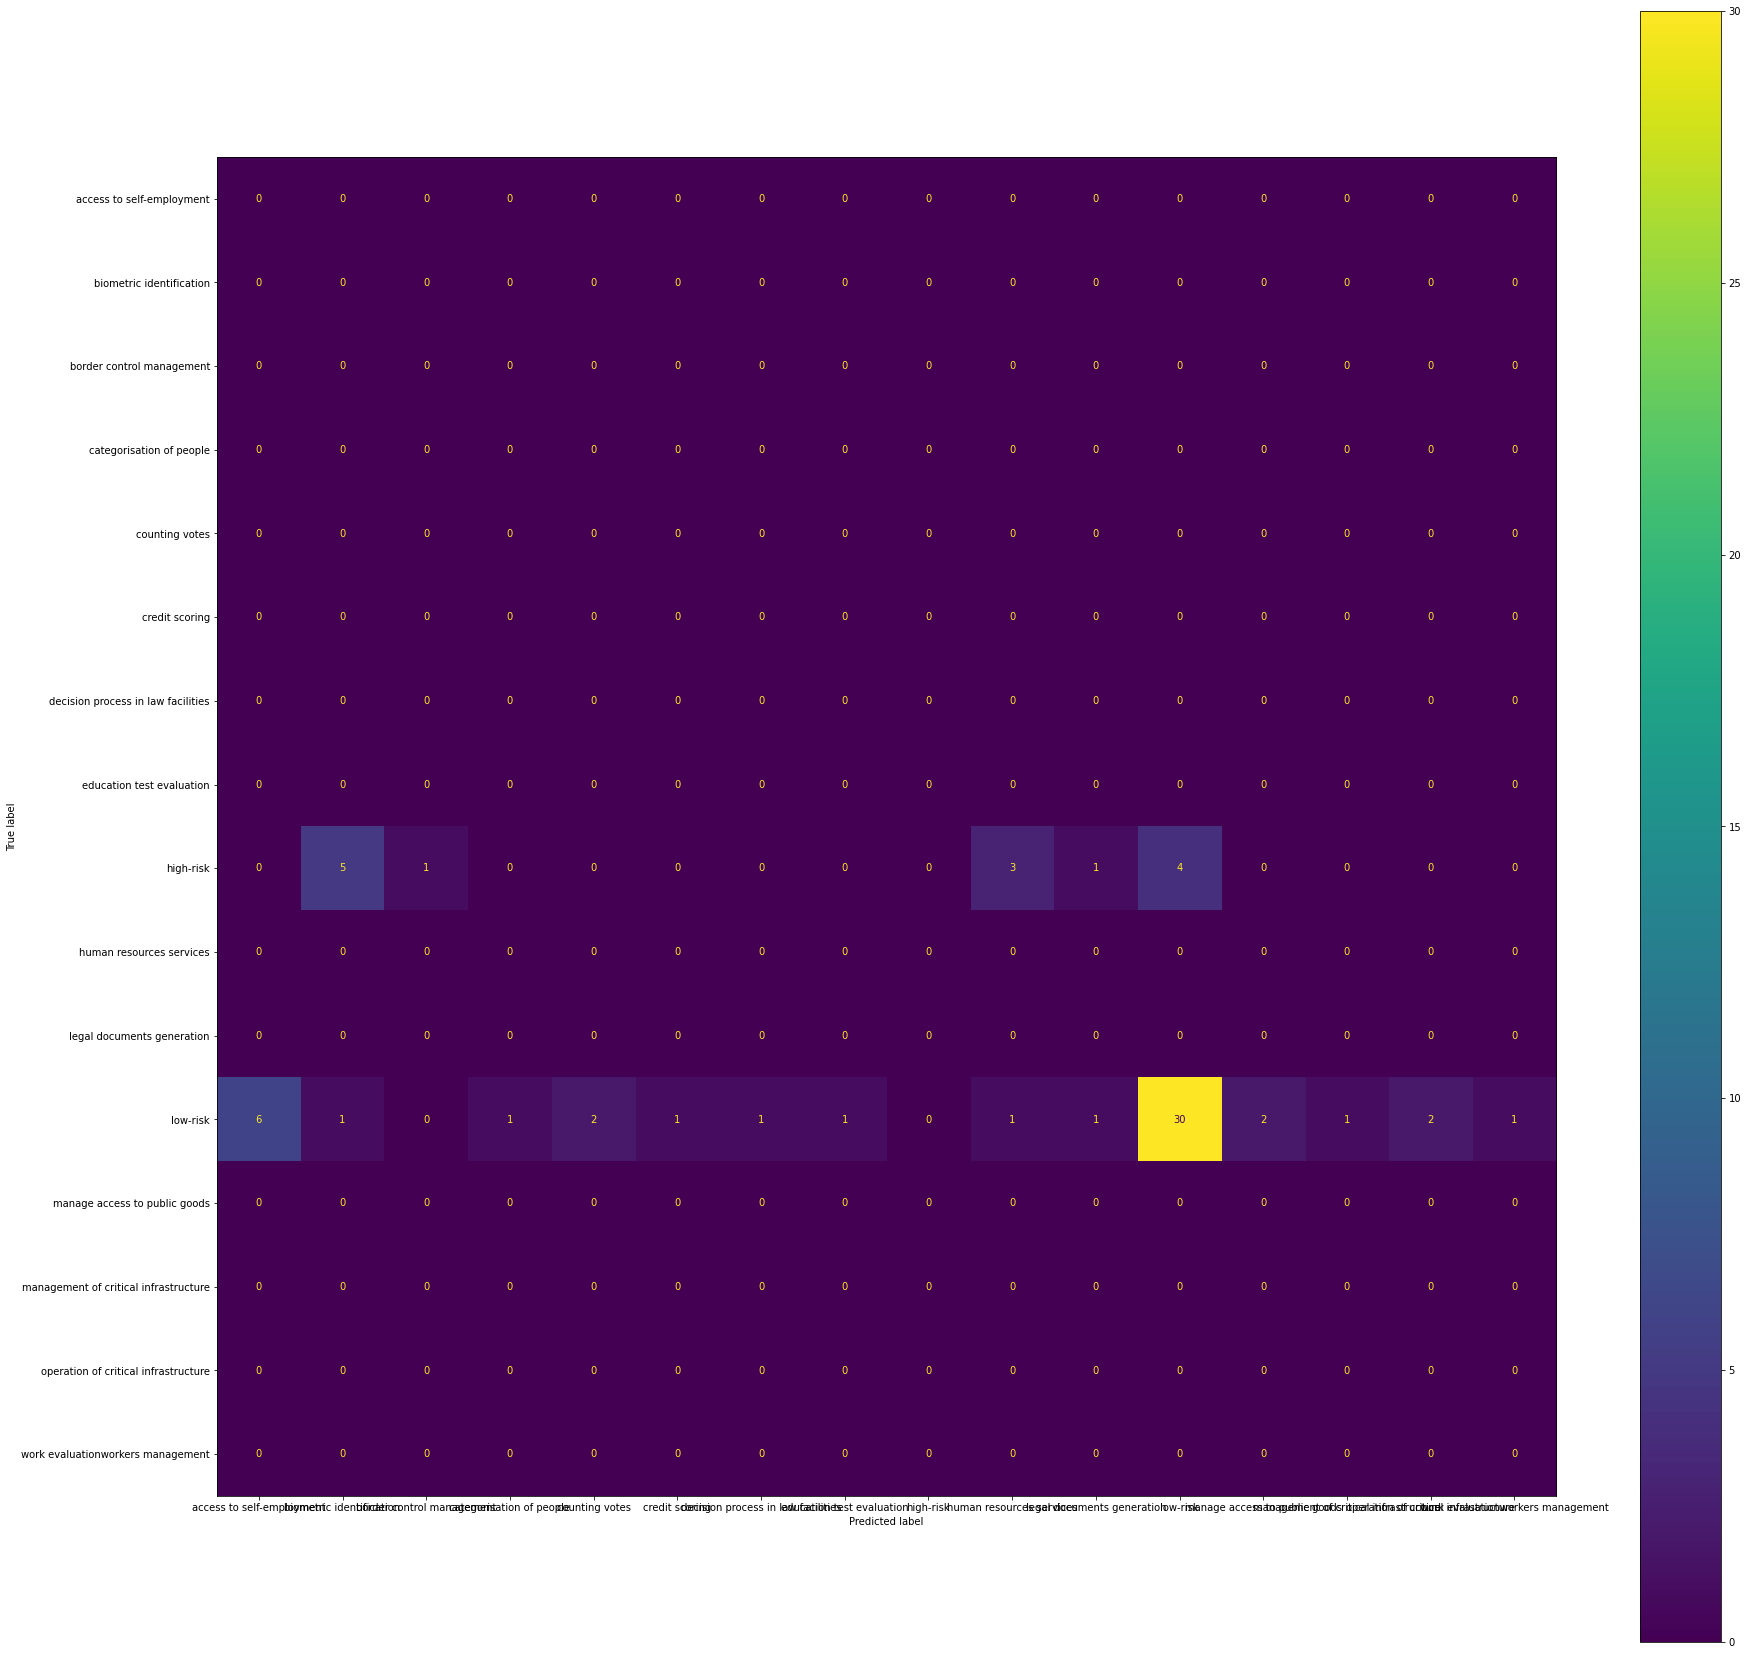

In [37]:
fig,ax = plt.subplots(figsize=(30,30))
plot_confusion_matrix(knn, embeddings_test, X_test["risk"].to_list() + ["high-risk" for _ in range(len(X_train[X_train["risk"] == "high-risk"]["desc"]))], ax=ax)

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score, get_scorer, make_scorer
scs = cross_val_score(knn, embeddings_cross, df["risk"], scoring=make_scorer(balanced_accuracy_score))
scs.mean()

0.5705882352941176

In [39]:
class CLF():
    def __init__():
        pass
    